In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

**NOTE**: You can only unzip a zipped tuple once before it is removed from the computer's memory. Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

- Iterate through the coordinates' zipped tuple.
- Use `citipy.nearest_city()` and inside the parentheses of `nearest_city()`, add the latitude and longitude in this format: `coordinate[0]`, `coordinate[1]`.
- To print the city name, chain the city_name to the `nearest_city()` function.
- To print the country name, chain the country_code to the `nearest_city()` function.

In [6]:
# for x in coordinates:
#     print(citipy.nearest_city(x[0], x[1]).city_name,
#           citipy.nearest_city(x[0], x[1]).country_code)

In [7]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

616

- We create a `cities` list to store city names.
- We iterate through the `coordinates`, as in our practice, and retrieve the nearest city using the latitude and longitude pair.
- We add a decision statement with the logical operator `not in` to determine whether the found city is already in the `cities` list. If not, then we'll use the `append()` function to add it. We are doing this because among the 1,500 latitudes and longitudes, there might be duplicates, which will retrieve duplicate cities, and we want to be sure we capture only the unique cities.

**Note**: The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more.

**Finding**: When you run the code block, you should get slightly more than 500 unique cities. If you get fewer than 500, increase your `size` limit on the np.`random.uniform()` function.

1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
2. Loop through the cities list.
3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
   1. Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
4. Build the `city_url` or endpoint for each city.
5. Log the URL and the record and set numbers.
6. Make an API request for each city.
7. Parse the JSON weather data for the following:
   1. City, country, and date
   2.  Latitude and longitude
   3.  Maximum temperature
   4.  Humidity
   5.  Cloudiness
   6.  Wind speed
8.  Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | muros
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | artyk
City not found. Skipping...
Processing Record 6 of Set 1 | eureka
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | lorengau
Processing Record 9 of Set 1 | quatre cocos
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | lompoc
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | north bend
Processing Record 15 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 16 of Set 1 | meyungs
City not found. Skipping...
Processing Record 17 of Set 1 | sibolga
Processing Record 18 of Set 1 | poum
Processing Record 19 of Set 1 | esperance
Processing Record 20 of Set 1 | feira de santana
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | flind

Let's break down the code so we understand fully before continuing:

- We create the `for` loop with the `enumerate()` method and reference the index and the city in the list.
- In the conditional statement, we check if the remainder of the index divided by 50 is equal to 0 and if the index is greater than or equal to 50. If the statement is true, then the `set_count` and the `record_count` are incremented by 1.
- Inside the conditional statement, we create the URL endpoint for each city, as before. However, we are removing the blank spaces in the city name and concatenating the city name with, `city.replace(" ","+")`. This will find the corresponding weather data for the city instead of finding the weather data for the first part of the city name.
- Also, we add a print statement that tells us the record count and set count, and the city that is being processed.
- Then we add one to the record count before the next city is processed.

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Muros,42.7762,-9.0603,53.10,66,0,15.46,ES,2022-01-20 21:31:28
1,Bluff,-46.6000,168.3333,56.80,71,67,15.50,NZ,2022-01-20 21:31:29
2,Iqaluit,63.7506,-68.5145,-25.31,74,20,5.01,CA,2022-01-20 21:30:13
3,Eureka,40.8021,-124.1637,60.67,82,54,7.00,US,2022-01-20 21:31:29
4,Busselton,-33.6500,115.3333,73.09,45,13,7.92,AU,2022-01-20 21:31:30
5,Lorengau,-2.0226,147.2712,81.72,78,100,7.90,PG,2022-01-20 21:31:30
6,Quatre Cocos,-20.2078,57.7625,80.71,82,53,11.70,MU,2022-01-20 21:31:30
7,Mataura,-46.1927,168.8643,56.48,59,65,9.40,NZ,2022-01-20 21:31:31
8,Rikitea,-23.1203,-134.9692,78.58,73,100,8.95,PF,2022-01-20 21:31:31
9,Lompoc,34.6391,-120.4579,79.02,62,0,11.50,US,2022-01-20 21:31:32


In [13]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Muros,ES,2022-01-20 21:31:28,42.7762,-9.0603,53.10,66,0,15.46
1,Bluff,NZ,2022-01-20 21:31:29,-46.6000,168.3333,56.80,71,67,15.50
2,Iqaluit,CA,2022-01-20 21:30:13,63.7506,-68.5145,-25.31,74,20,5.01
3,Eureka,US,2022-01-20 21:31:29,40.8021,-124.1637,60.67,82,54,7.00
4,Busselton,AU,2022-01-20 21:31:30,-33.6500,115.3333,73.09,45,13,7.92
...,...,...,...,...,...,...,...,...,...
563,Bilma,NE,2022-01-20 21:46:41,18.6853,12.9164,56.30,22,0,7.65
564,Shingu,JP,2022-01-20 21:46:42,33.7333,135.9833,32.22,69,3,7.09
565,Luwuk,ID,2022-01-20 21:46:42,-0.9516,122.7875,76.89,84,100,3.11
566,Umea,SE,2022-01-20 21:46:42,63.8284,20.2597,30.13,59,0,18.41


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plotting the Data

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

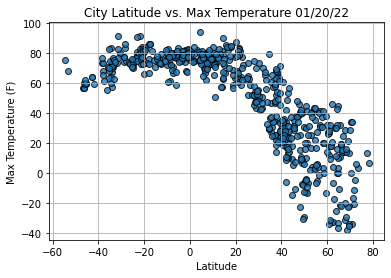

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

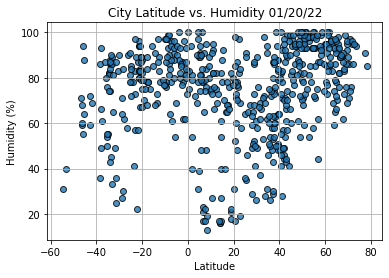

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

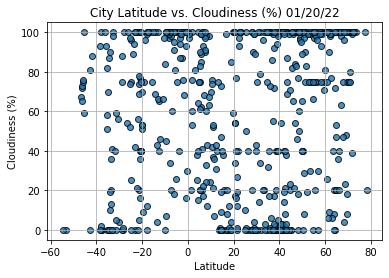

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

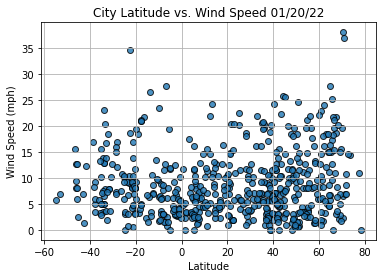

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [58]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

    # Calculate Stats
    if p_value < .05:
        p_sig = "Statistically Significant"
    else:
        p_sig = "Not Statistically Significant"

    r_sig = str(round((abs(r_value)/1*100),2))+'%'

    print(f'Slope: {slope:.5f}\nR Value: {r_value:.5f} - {r_sig}\nP value: {p_value:.5f} - {p_sig}\nStd. Err: {std_err:.5f}')

In [37]:
import inspect
inspect.signature(plot_linear_regression)

<Signature (x_values, y_values, title, y_label, text_coordinates)>

In [38]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

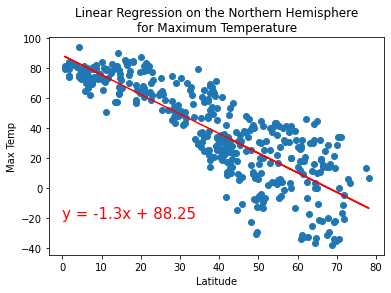

Slope: -1.30284
R Value: -0.83372 - 83.37%
P value: 0.00000 - Statistically Significant
Std. Err: 0.04336


In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(0,-20))

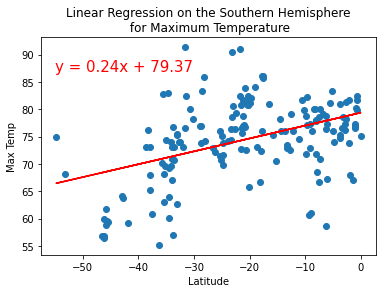

Slope: 0.23574
R Value: 0.43183 - 43.18%
P value: 0.00000 - Statistically Significant
Std. Err: 0.03799


In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-55,87))

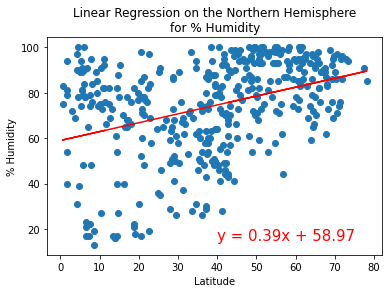

Slope: 0.39069
R Value: 0.37173 - 37.17%
P value: 0.00000 - Statistically Significant
Std. Err: 0.04903


In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity', '% Humidity',(40,15))

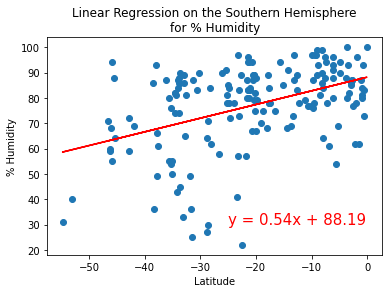

Slope: 0.53920
R Value: 0.43130 - 43.13%
P value: 0.00000 - Statistically Significant
Std. Err: 0.08702


In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity', '% Humidity',(-25,30))

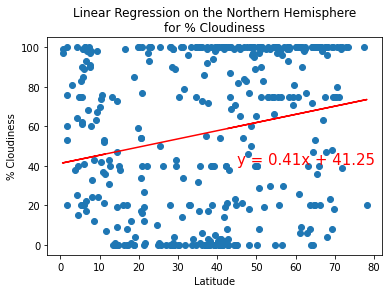

Slope: 0.41306
R Value: 0.20995 - 21.0%
P value: 0.00002 - Statistically Significant
Std. Err: 0.09666


In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Cloudiness', '% Cloudiness',(45,41))

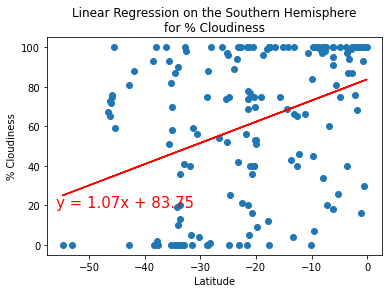

Slope: 1.07183
R Value: 0.37778 - 37.78%
P value: 0.00000 - Statistically Significant
Std. Err: 0.20267


In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Cloudiness', '% Cloudiness',(-56,19))

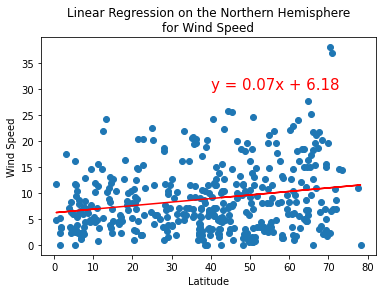

Slope: 0.06818
R Value: 0.21409 - 21.41%
P value: 0.00002 - Statistically Significant
Std. Err: 0.01563


In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 'Wind Speed',(40,30))


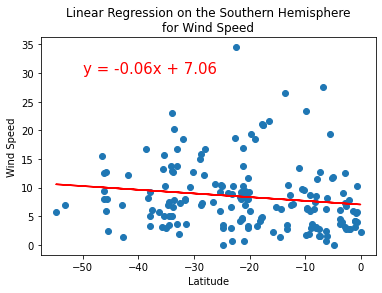

Slope: -0.06441
R Value: -0.14537 - 14.54%
P value: 0.05857 - Not Statistically Significant
Std. Err: 0.03382


In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Wind Speed', 'Wind Speed',(-50,30))